In [2]:
import numpy as np 
import torch 
from torch.utils.data import Dataset, DataLoader

In [12]:
pos_list = [[20,20], [20,60], [20,100], 
            [60,20], [60,60], [60,100], 
            [100,20], [100,60], [100,100]]
# pos_list = []
d_PGM = torch.load('PGM_shape_size_color_normalized.pt') # torch.Size([7, 10, 10, 40, 40])

def load_PGM_inputs(attr): 
    """attr: (3, 9, 3), (num_panel, num_pos, num_attr)"""
    inputs = -0.6891*torch.ones((3, 160, 160))
    for i_panel in range(3): 
        for i_pos in range(9): 
            if attr[i_panel, i_pos, 0] != -1: 
                i_shape, i_size, i_color = attr[i_panel, i_pos]
                x0, y0 = pos_list[i_pos]
                inputs[i_panel, x0:(x0+40), y0:(y0+40)] = d_PGM[int(i_shape), int(i_size), int(i_color)]
    return inputs 

class dataset_PGM_single(Dataset): 
    def __init__(self, attr_list): 
        """attr_list: [num_samples, 3, 9, 3]"""
        self.attr_list = attr_list  
        
    def __len__(self): 
        return len(self.attr_list)
    
    def __getitem__(self, idx): 
        """attr: [3, 9, 3]"""
        attr = self.attr_list[idx] 
        inputs = load_PGM_inputs(attr)
        return inputs

In [5]:
train_inputs = torch.load('train_inputs_new.pt') # [35, 10000, 3, 9, 3]

In [6]:
# example: 
i_class = 0
dataset_class0 = dataset_PGM_single(train_inputs[i_class]) 
load_class0 = DataLoader(dataset_class0, batch_size=256, shuffle=False, pin_memory=True) 

In [10]:
train_inputs[i_class][:, :, :, 0]

tensor([[[ 5,  5,  5,  ...,  5,  5,  5],
         [ 5,  5, -1,  ...,  5, -1, -1],
         [ 5, -1,  5,  ..., -1,  5,  5]],

        [[-1,  6,  6,  ..., -1,  6,  6],
         [ 6, -1, -1,  ...,  6,  6, -1],
         [ 6,  6,  6,  ..., -1,  6,  6]],

        [[ 2, -1,  2,  ...,  2,  2,  2],
         [ 2,  2,  2,  ..., -1,  2,  2],
         [-1, -1,  2,  ...,  2,  2, -1]],

        ...,

        [[ 6,  6, -1,  ..., -1, -1, -1],
         [-1, -1, -1,  ..., -1, -1, -1],
         [-1, -1,  6,  ..., -1, -1, -1]],

        [[-1, -1,  6,  ...,  6,  6,  6],
         [ 6, -1,  6,  ...,  6,  6, -1],
         [ 6,  6,  6,  ...,  6,  6,  6]],

        [[-1,  1,  1,  ...,  1,  1,  1],
         [-1,  1,  1,  ...,  1,  1,  1],
         [ 1, -1,  1,  ...,  1,  1,  1]]], dtype=torch.int32)

In [13]:
inputs = next(iter(load_class0))

In [50]:
torch.cat([mtg1, mtg2, mtg3], dim=1).shape

torch.Size([3, 486, 484])

In [ ]:
from torchvision.transforms import Resize
import PIL
resize_transform = Resize(size=(192, 192), interpolation=PIL.Image.BICUBIC)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


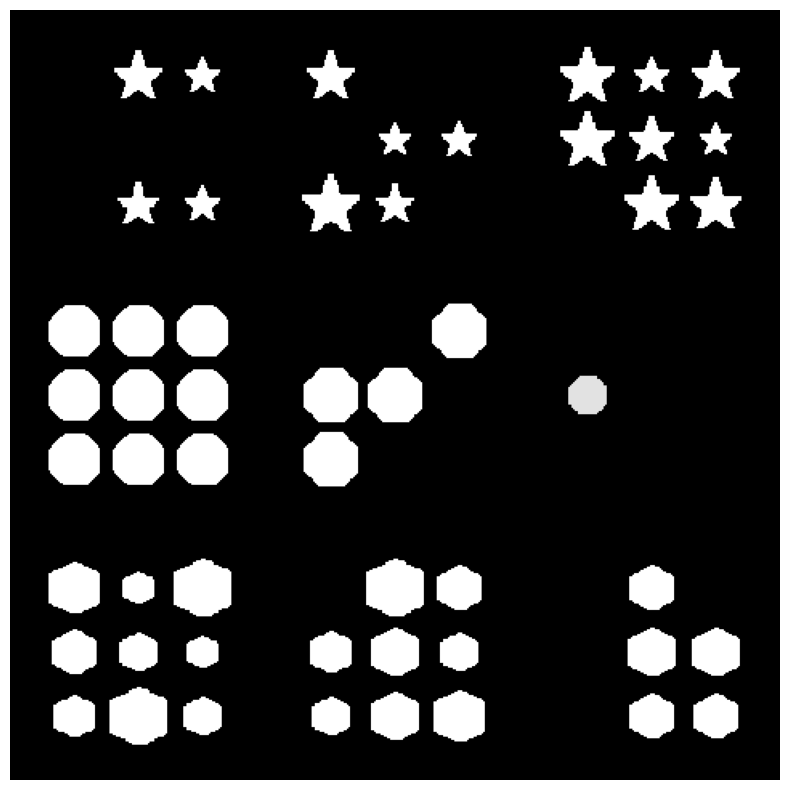

In [18]:
import torchvision
from torchvision.utils import save_image, make_grid
import torch.nn.functional as F
import matplotlib.pyplot as plt
mtg1 = make_grid(inputs[1,][:,None] / -0.6891, nrow=3, padding=0, pad_value=1)
mtg2 = make_grid(inputs[4,][:,None] / -0.6891, nrow=3, padding=0, pad_value=1)
mtg3 = make_grid(inputs[10,][:,None] / -0.6891, nrow=3, padding=0, pad_value=1)
plt.figure(figsize=(10,10))
# plt.imshow(1-torchvision.transforms.Resize((160, 160))(
#            torch.cat([mtg1, mtg2, mtg3], dim=1),).permute(1,2,0))
plt.imshow(1-(
           torch.cat([mtg1, mtg2, mtg3], dim=1)).permute(1,2,0))
plt.axis('off')
plt.show()


In [21]:
# train_inputs = torch.load("attr_all.npy")
train_inputs = np.load("attr_all.npy", allow_pickle=True)

In [24]:
# example: 
i_class = 31
dataset_class0 = dataset_PGM_single(train_inputs[i_class]) 
load_class0 = DataLoader(dataset_class0, batch_size=256, shuffle=False, pin_memory=True) 
inputs = next(iter(load_class0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


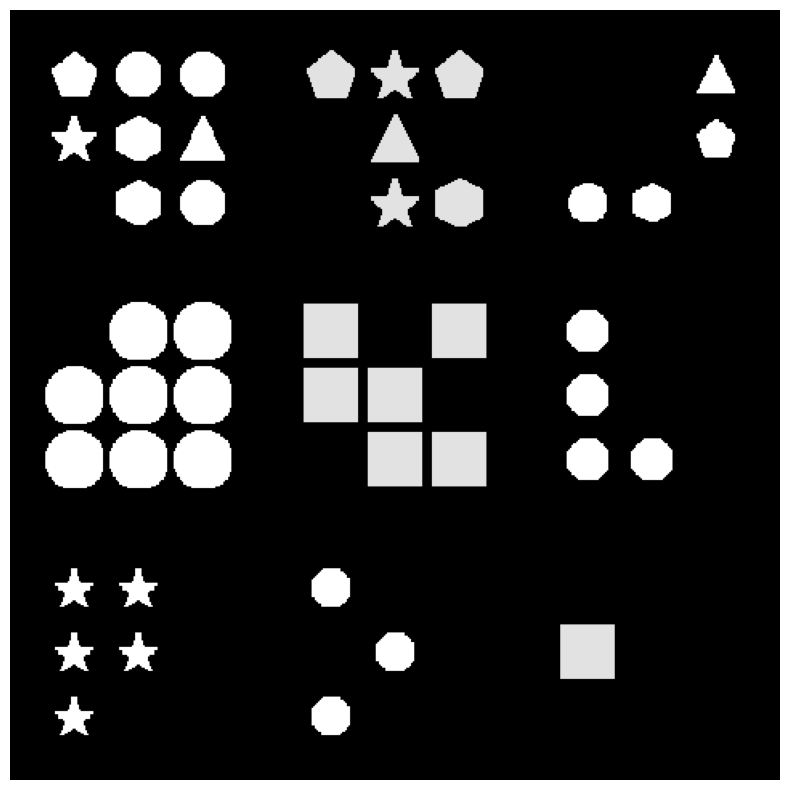

In [29]:
import torchvision
from torchvision.utils import save_image, make_grid
import torch.nn.functional as F
import matplotlib.pyplot as plt
mtg1 = make_grid(inputs[0,][:,None] / -0.6891, nrow=3, padding=0, pad_value=1)
mtg2 = make_grid(inputs[2,][:,None] / -0.6891, nrow=3, padding=0, pad_value=1)
mtg3 = make_grid(inputs[12,][:,None] / -0.6891, nrow=3, padding=0, pad_value=1)
plt.figure(figsize=(10,10))
# plt.imshow(1-torchvision.transforms.Resize((160, 160))(
#            torch.cat([mtg1, mtg2, mtg3], dim=1),).permute(1,2,0))
plt.imshow(1-(torch.cat([mtg1, mtg2, mtg3], dim=1)).permute(1,2,0))
plt.axis('off')
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


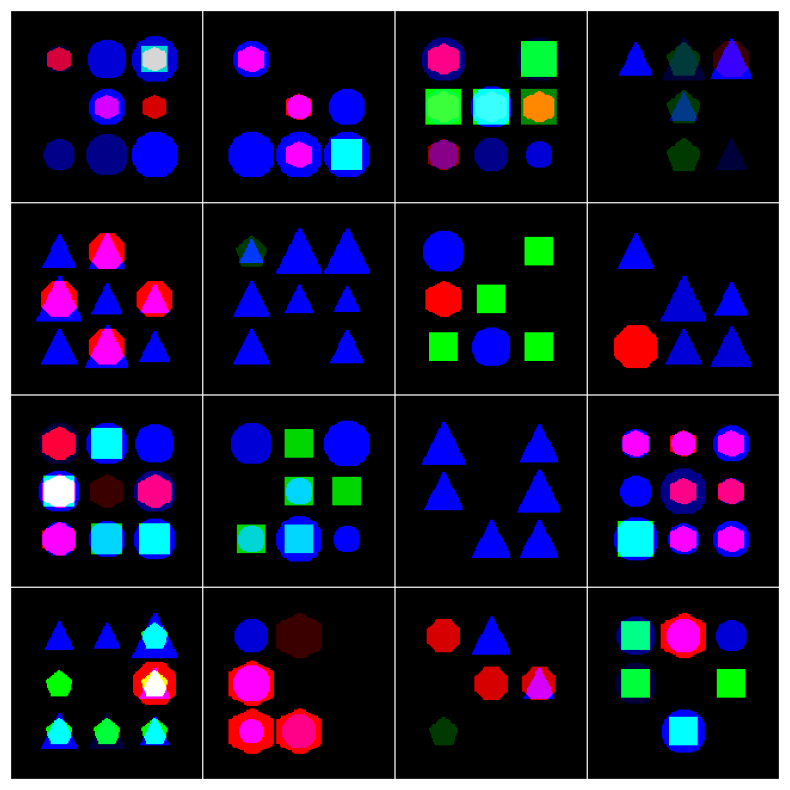

In [11]:
from torchvision.utils import save_image, make_grid
import matplotlib.pyplot as plt
mtg = make_grid(inputs[:16], nrow=4, padding=1, pad_value=1)
plt.figure(figsize=(10,10))
plt.imshow(mtg.permute(1,2,0))
plt.axis('off')
plt.show()